In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import re
import glob
import time

import pickle
import pydicom
import matplotlib.pyplot as plt

import data_splitter as ds
import data_loader as dl
import feature_extraction as fex

2023-04-04 23:22:36.868953: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 23:22:37.999163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 23:22:45.466571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# checking if all the images are downloaded properly
path = "/*/*.dcm"

dicom_files = []
for filepath in glob.glob(path):
    dicom_files.append(int(re.search('.+/([0-9]+).dcm', filepath).group(1)))

print(len(dicom_files))   

54706


In [2]:
metadata = pd.read_csv('train.csv')
len(metadata.image_id.unique())

54706

In [3]:
splitter = ds.DataSplitter(verbose=True)

Total patient_id in training set:  9530
Total patient_id in test set:  2383
Total image_id in training set:  43767
Total image_id in test set:  10939
Total patient_id in training set:  7624
Total patient_id in calibration set:  1906
Total image_id in training set:  35003
Total image_id in calibration set:  8764


In [4]:
# image id of all sample training set after split to calib and train set

train_img_ids = [id for k, v in splitter.trainset.items() for id in v]
print(len(train_img_ids))

35003


# Determining no. of components based on 25% sample

In [7]:
# stratified sampling 25% from the training set >> 8,751 images
sample = metadata[metadata['patient_id'].isin(splitter.trainset.keys())]
sample = sample.groupby('cancer', group_keys=False).apply(lambda x: x.sample(frac=0.25))
sample_img_ids = list(sample.image_id.unique())

print(len(sample.patient_id.unique()), len(sample_img_ids))

5507 8751


## Vary image resolution

In [23]:
BATCH_SIZE = 128 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (1024, 1024, 1)
BASEPATH = '/scratch/siads699w23_class_root/siads699w23_class/shared_data/team_mammogram/train_images'


img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (-1, 1)
    )

In [24]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_1024.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
--Training batch  35
--Training batch  36
--Training batch  37
--Training batch  38
--Training batch  39
--Training batch  40
--Training batch  41
--Training batch  42
--Training batch  43
--Training batch  44
--Training batch  45
--Training batch  46
--

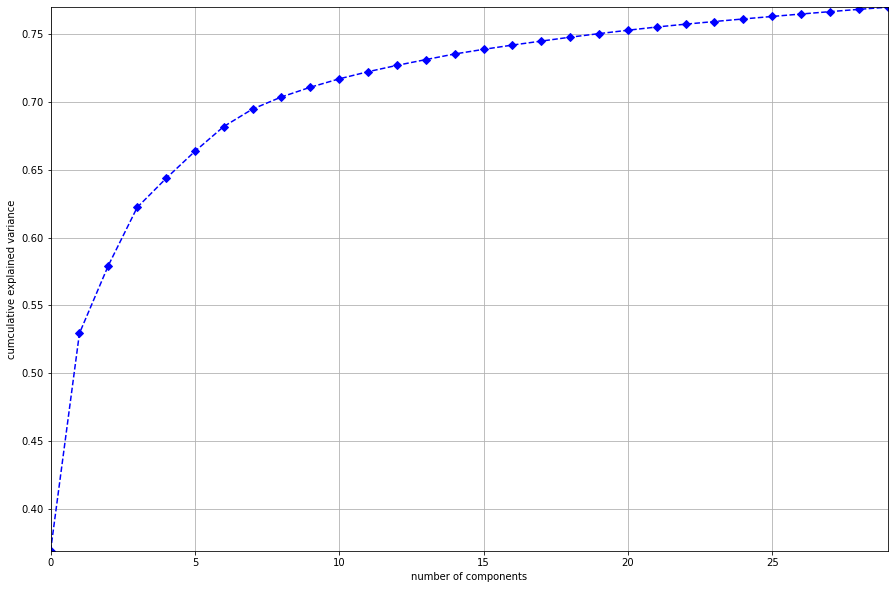

In [56]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

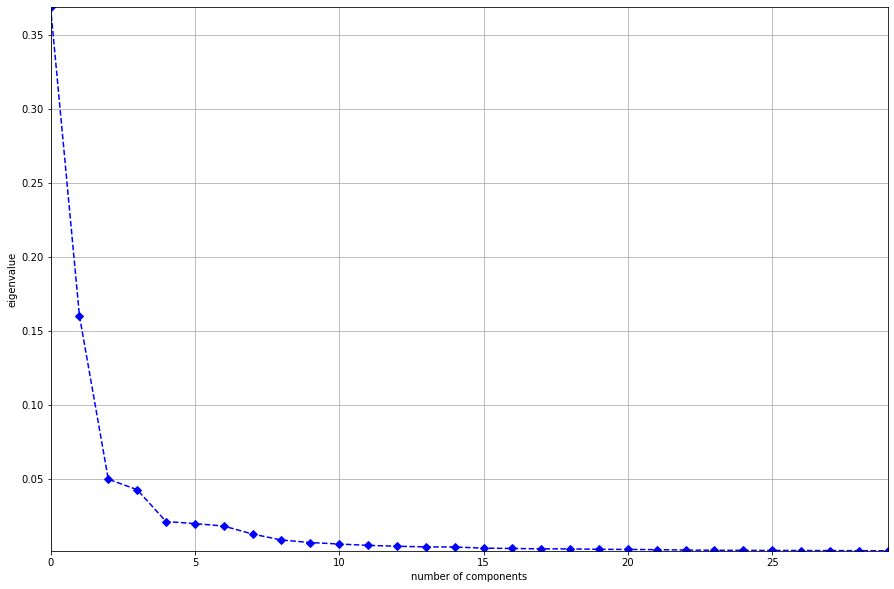

In [57]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [62]:
BATCH_SIZE = 128 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (512, 512, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (-1, 1)
    )

In [59]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_512.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
--Training batch  35
--Training batch  36
--Training batch  37
--Training batch  38
--Training batch  39
--Training batch  40
--Training batch  41
--Training batch  42
--Training batch  43
--Training batch  44
--Training batch  45
--Training batch  46
--

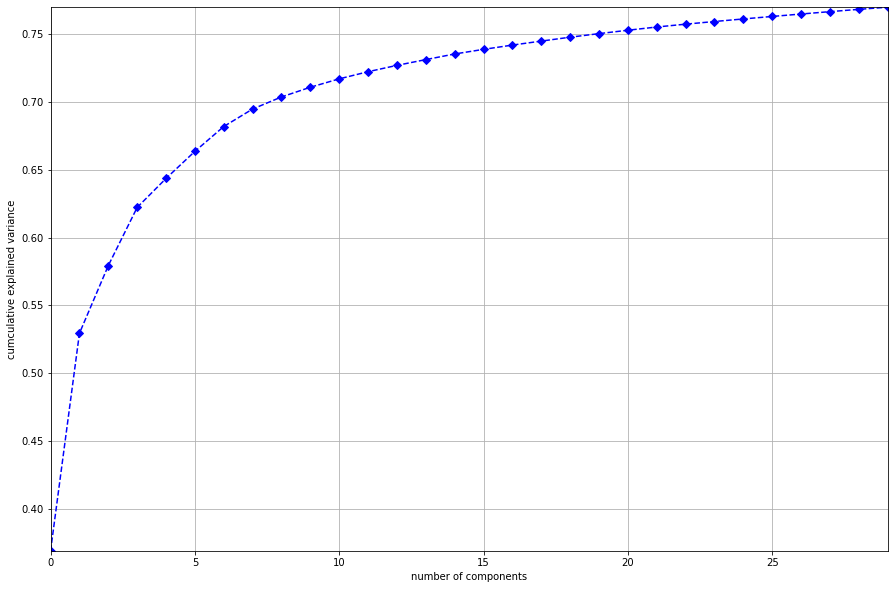

In [60]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

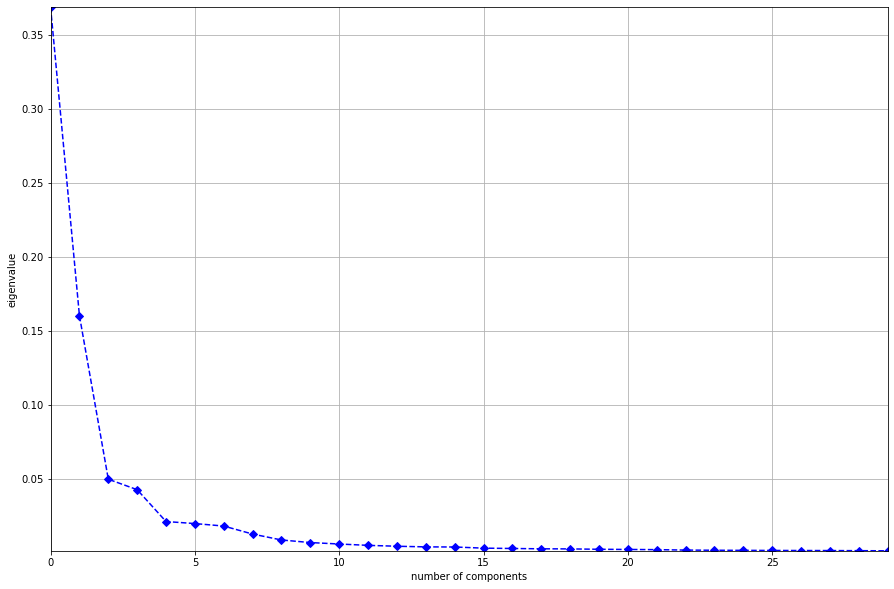

In [61]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [64]:
BATCH_SIZE = 128 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (256, 256, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (-1, 1)
    )

In [65]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_256.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
--Training batch  35
--Training batch  36
--Training batch  37
--Training batch  38
--Training batch  39
--Training batch  40
--Training batch  41
--Training batch  42
--Training batch  43
--Training batch  44
--Training batch  45
--Training batch  46
--

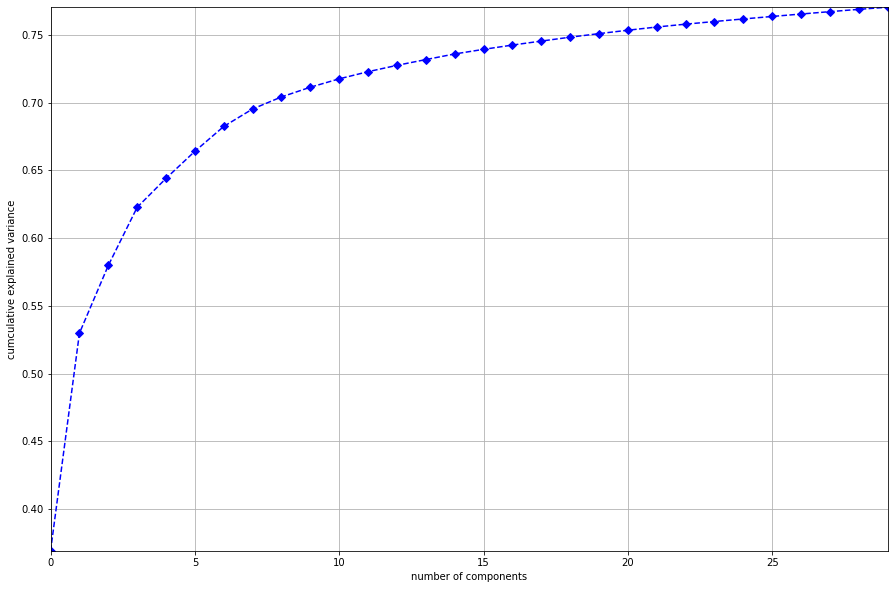

In [66]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

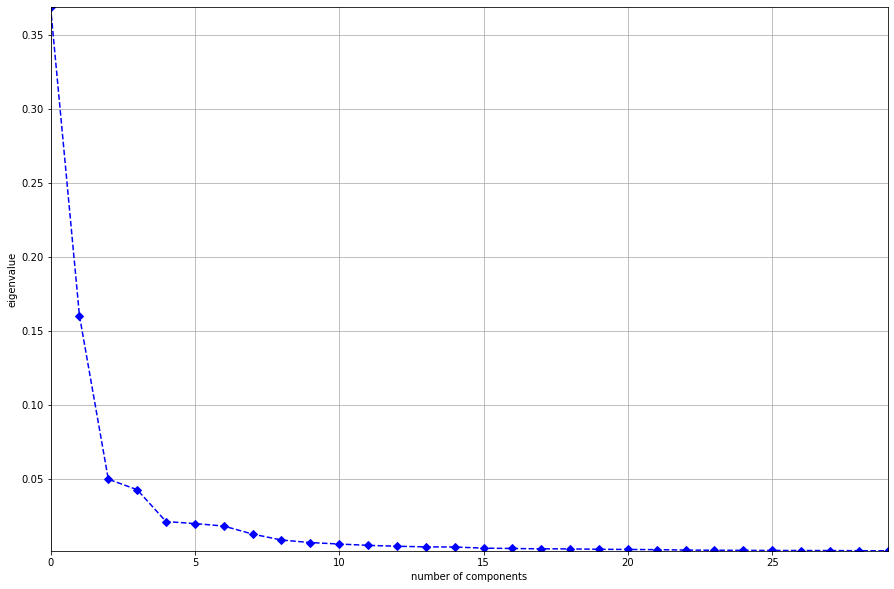

In [67]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [3]:
# load the model from disk
ipca_1024 = pickle.load(open('../feature_extractors/ipca_sample_1024.pkl', 'rb'))
ipca_512 = pickle.load(open('../feature_extractors/ipca_sample_512.pkl', 'rb'))
ipca_256 = pickle.load(open('../feature_extractors/ipca_sample_256.pkl', 'rb'))

In [75]:
resolution = ['1024x1024', '512x512', '256x256']
print('Image Resolution {}'.format(resolution[i]))

Image Resolution 1024x1024


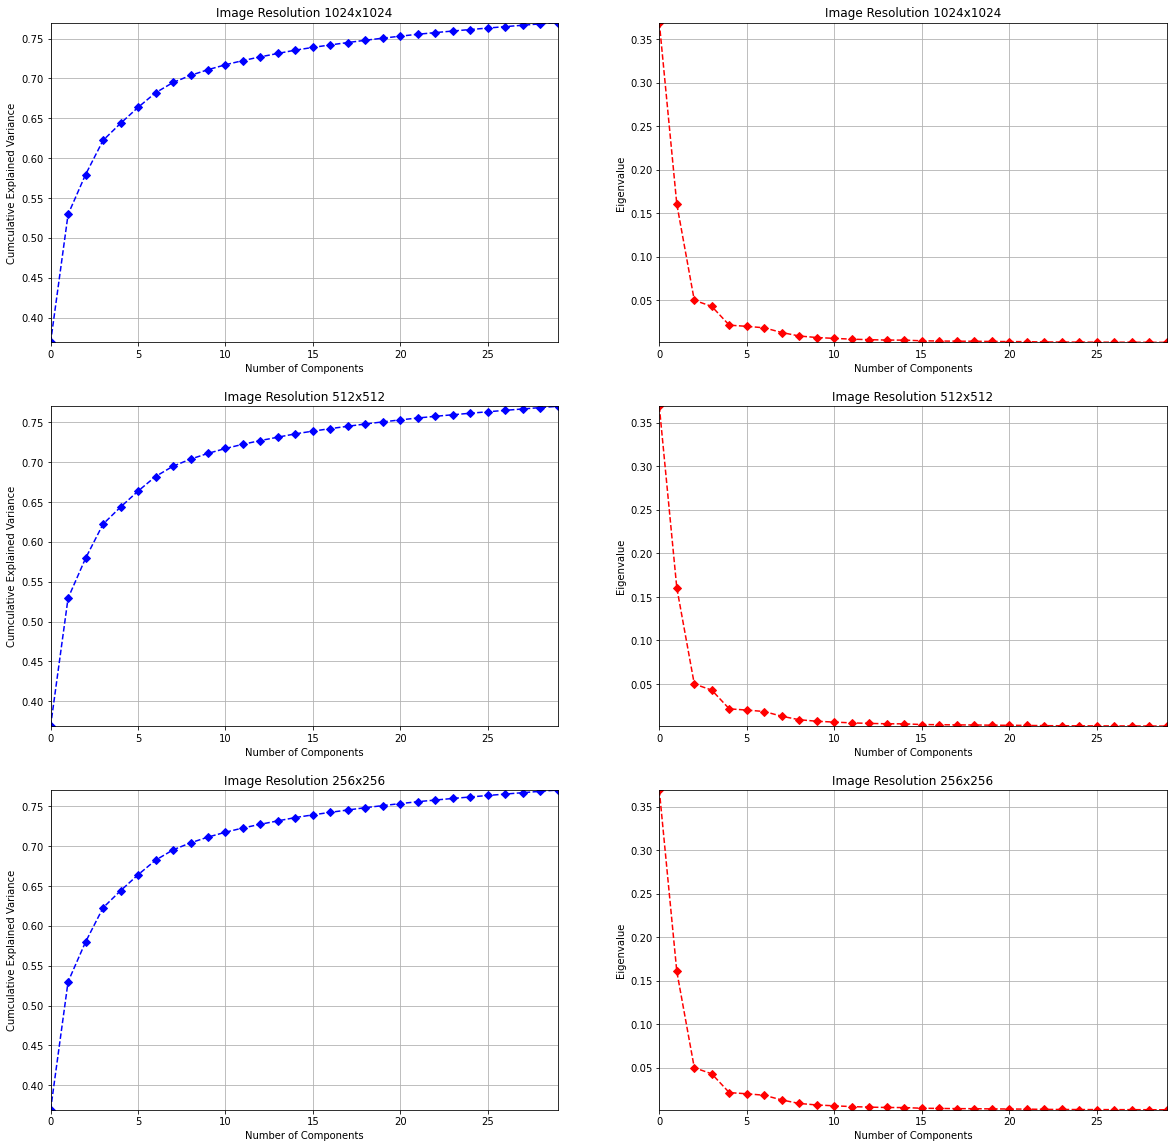

In [83]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

resolution = ['1024x1024', '512x512', '256x256']
for i, model in enumerate([ipca_1024, ipca_512, ipca_256]):
    
    axs[i, 0].plot(model.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
    axs[i, 0].set_title('Image Resolution {}'.format(resolution[i]))
    axs[i, 0].set_xlabel('Number of Components')
    axs[i, 0].set_xlabel('Number of Components')
    axs[i, 0].set_ylabel('Cumculative Explained Variance')
    #axs[i, 0].set_ylim(0, 1)
    axs[i, 0].margins(x=0,y=0)
    axs[i, 0].grid(axis='both')
    
    axs[i, 1].plot(model.explained_variance_ratio_[:30], marker='D', linestyle="--", color='red')
    axs[i, 1].set_title('Image Resolution {}'.format(resolution[i]))
    axs[i, 1].set_xlabel('Number of Components')
    axs[i, 1].set_ylabel('Eigenvalue')
    #axs[i, 1].set_ylim(0, 1)
    axs[i, 1].margins(x=0,y=0)
    axs[i, 1].grid(axis='both')
    

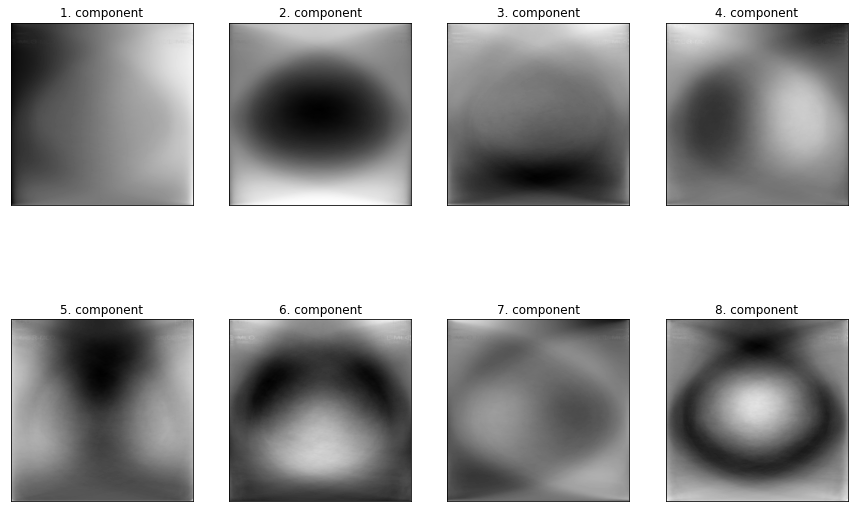

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_1024.components_[:8], axes.ravel())):
    ax.imshow(component.reshape(1024, 1024), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

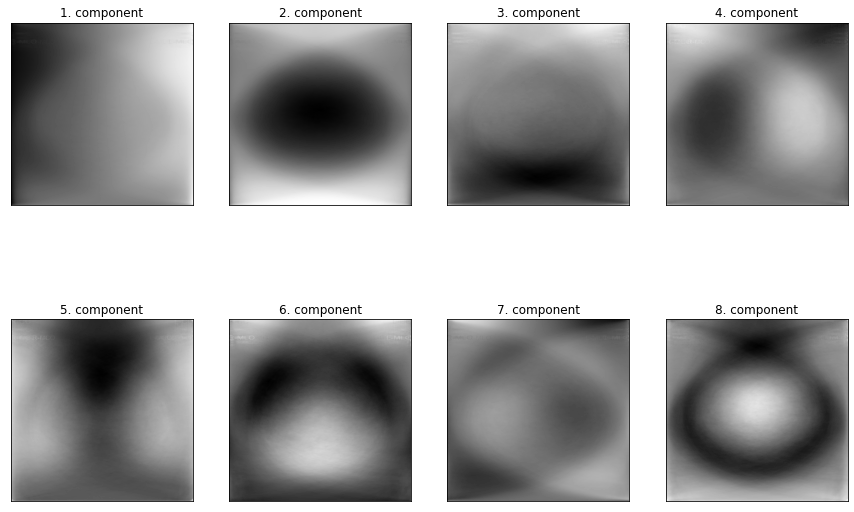

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_512.components_[:8], axes.ravel())):
    ax.imshow(component.reshape(512, 512), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

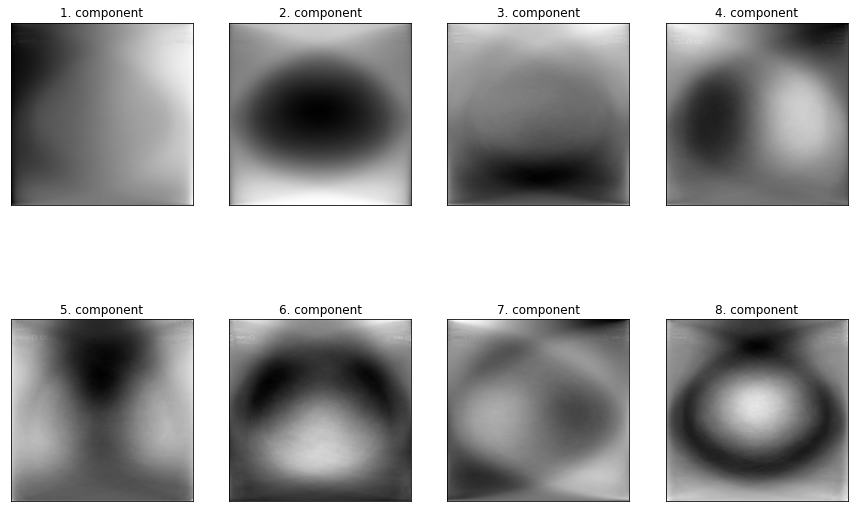

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_256.components_[:8], axes.ravel())):
    ax.imshow(component.reshape(256, 256), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

## Vary batch size

In [14]:
BATCH_SIZE = 256 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (256, 256, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (-1, 1)
    )

In [15]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_256_256batch.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
Training time: 4942.44305062294s


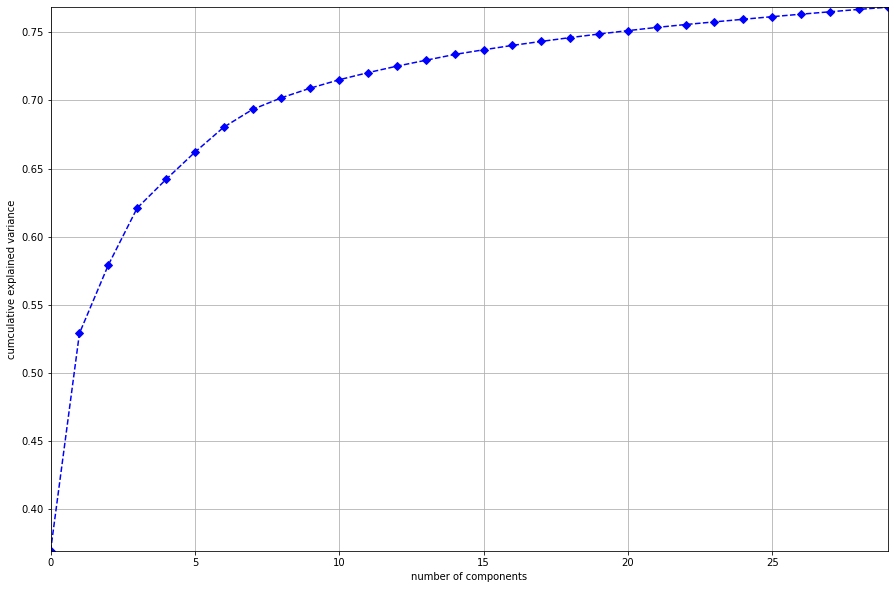

In [16]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

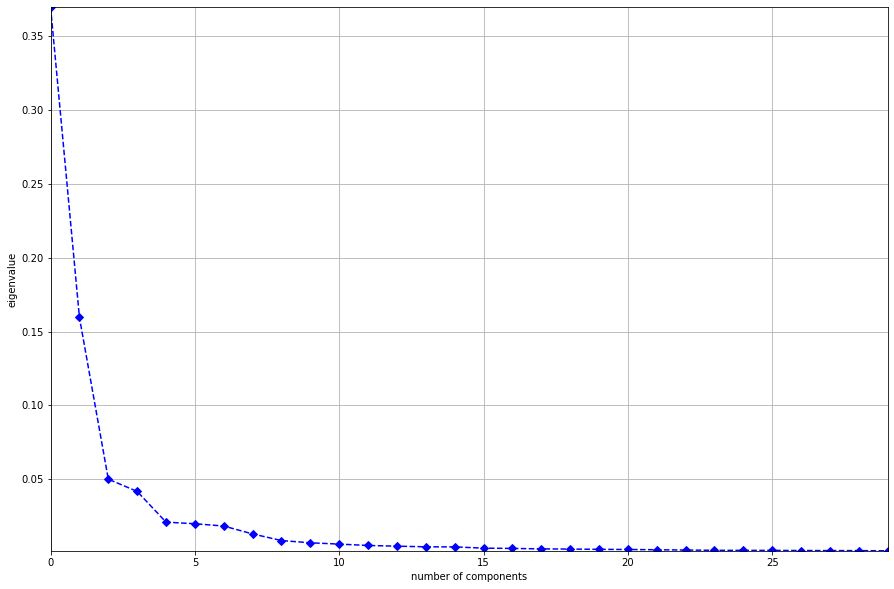

In [17]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [18]:
BATCH_SIZE = 64 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (256, 256, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (-1, 1)
    )

In [19]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_256_64batch.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
--Training batch  35
--Training batch  36
--Training batch  37
--Training batch  38
--Training batch  39
--Training batch  40
--Training batch  41
--Training batch  42
--Training batch  43
--Training batch  44
--Training batch  45
--Training batch  46
--

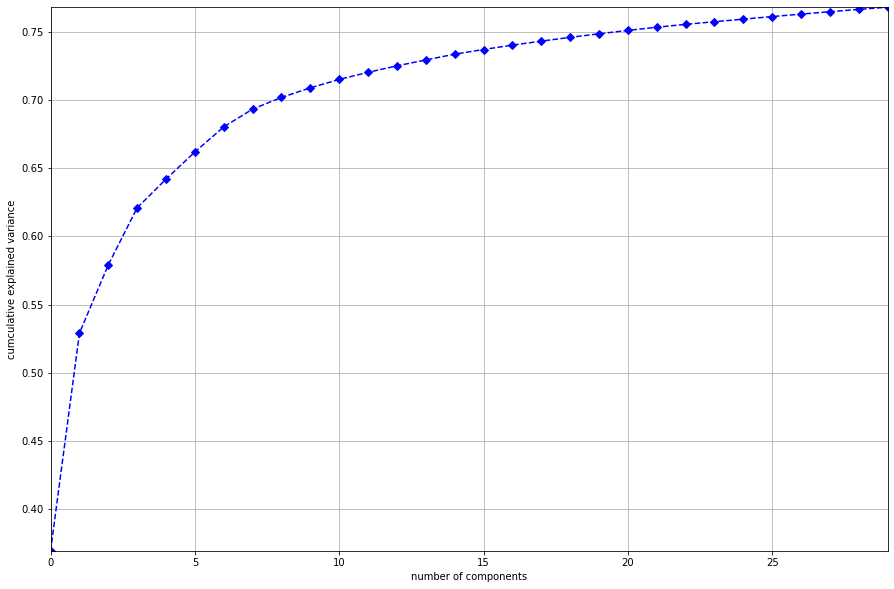

In [20]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

NameError: name 'ipca' is not defined

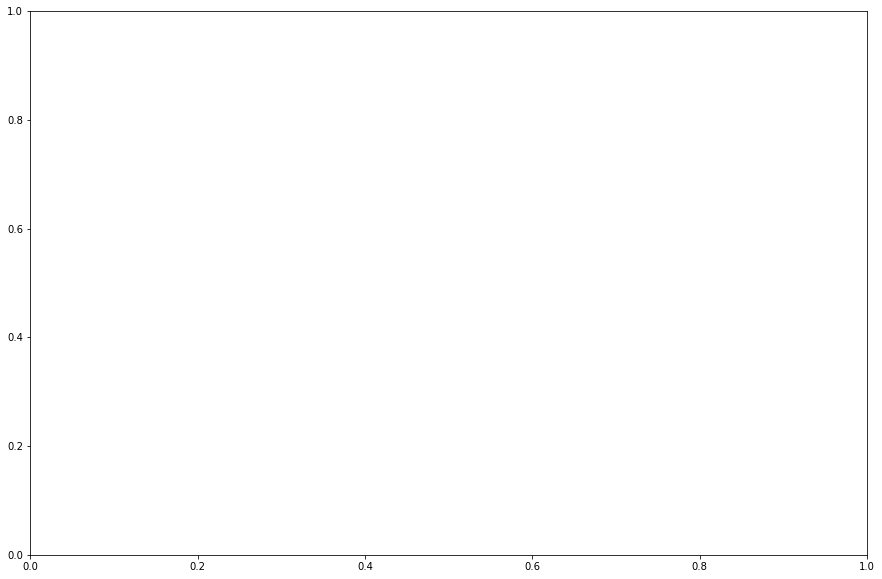

In [10]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

## Normalization vs. Standardization

In [12]:
BATCH_SIZE = 256 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (256, 256, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (0, 1) # change from (-1, 1)
    )

In [13]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_256_256batch_norm01.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
Training time: 6694.70334148407s


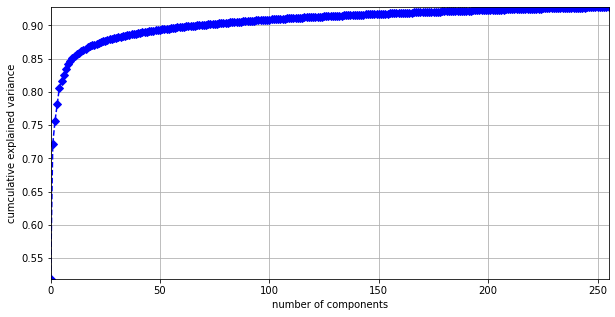

In [16]:
fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(ipca.explained_variance_ratio_.cumsum(), marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

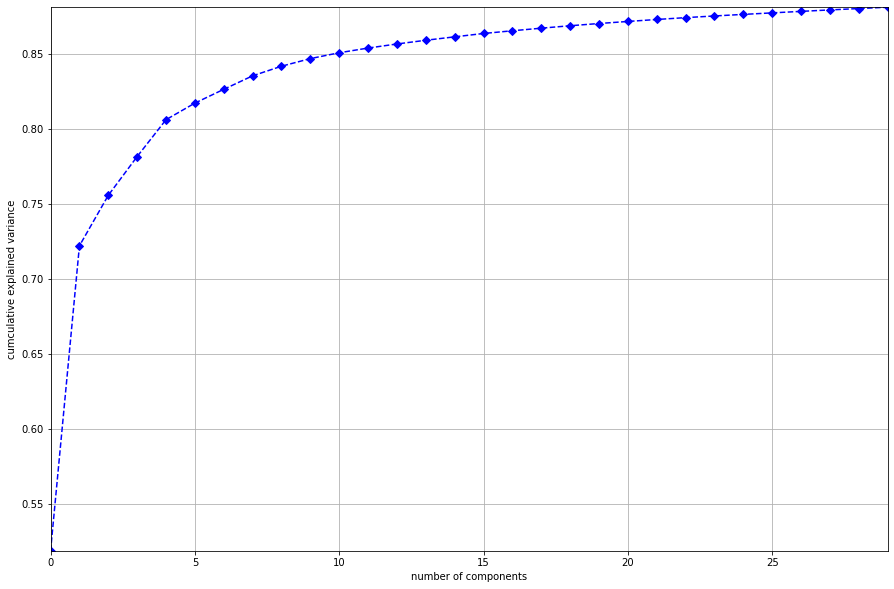

In [17]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

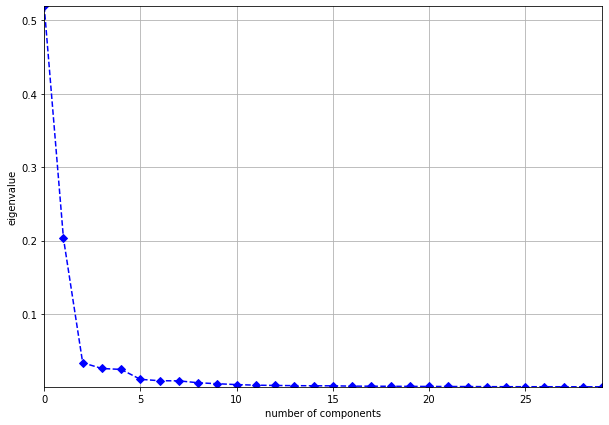

In [25]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [26]:
BATCH_SIZE = 256 # limitation: n_components must be less or equal to the batch number of samples
IMG_SIZE = (512, 512, 1)
BASEPATH = '' # directory of training images

img_gen = dl.ImgGenerator(
    list_IDs = sample_img_ids, # use the 25% sample
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (0, 1) # change from (-1, 1)
    )

In [27]:
start = time.time()
ipca = fex.train_feature_extractor(
    img_gen = img_gen,
    model_name = 'PCA',
    n_components=None,
    save_path='../feature_extractors/ipca_sample_512_256batch_norm01.pkl',
    verbose=True
    )
stop = time.time()
print(f"Training time: {stop - start}s")

Initialized PCA with n_components = None
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
Training time: 8001.489869356155s


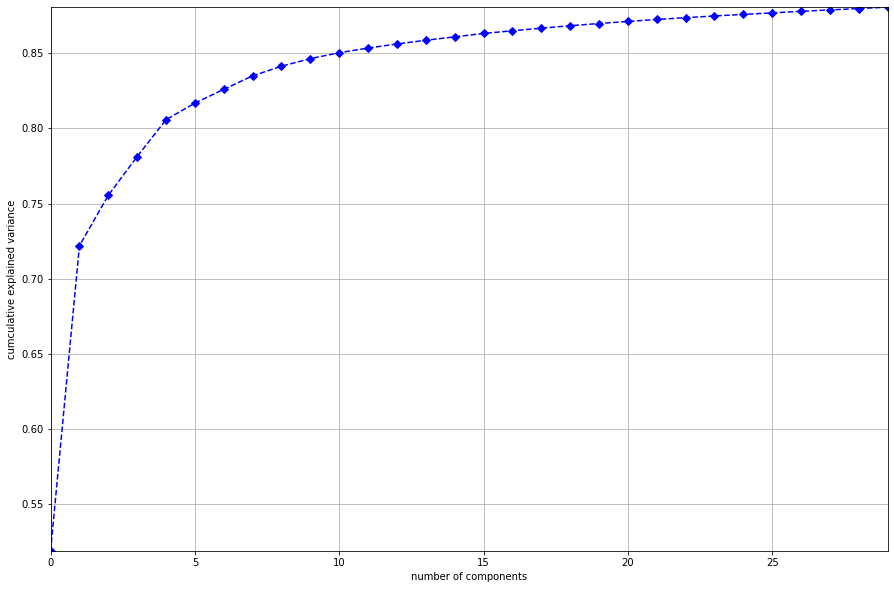

In [28]:
fig, axs = plt.subplots(figsize=(15, 10))

axs.plot(ipca.explained_variance_ratio_.cumsum()[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

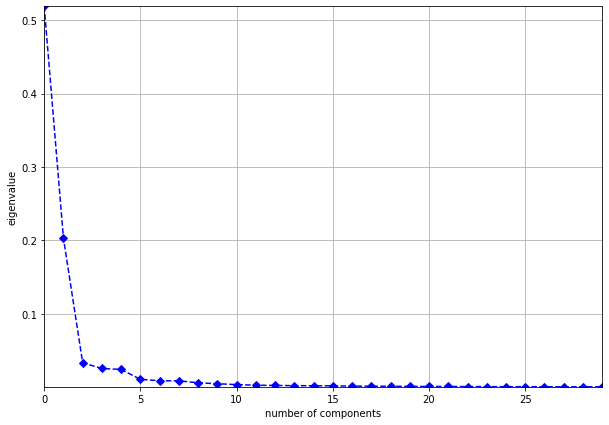

In [29]:
fig, axs = plt.subplots(figsize=(10, 7))

axs.plot(ipca.explained_variance_ratio_[:30], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('eigenvalue')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

In [10]:
# load the model from disk
ipca_256 = pickle.load(open('../feature_extractors/ipca_sample_256_256batch.pkl', 'rb'))
ipca_512 = pickle.load(open('../feature_extractors/ipca_sample_512.pkl', 'rb'))

ipca_256_norm = pickle.load(open('../feature_extractors/ipca_sample_256_256batch_norm01.pkl', 'rb'))
ipca_512_norm = pickle.load(open('../feature_extractors/ipca_sample_512_256batch_norm01.pkl', 'rb'))

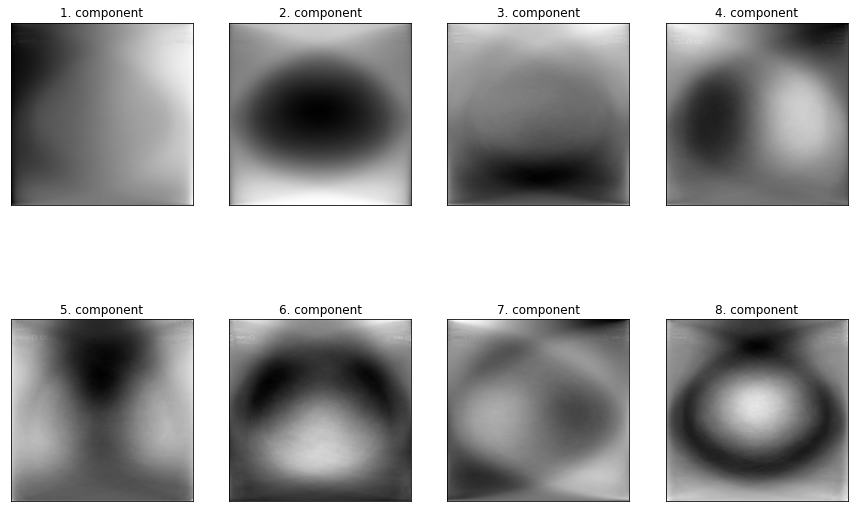

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_256.components_[:8], axes.ravel())):
    ax.imshow(component.reshape(256, 256), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

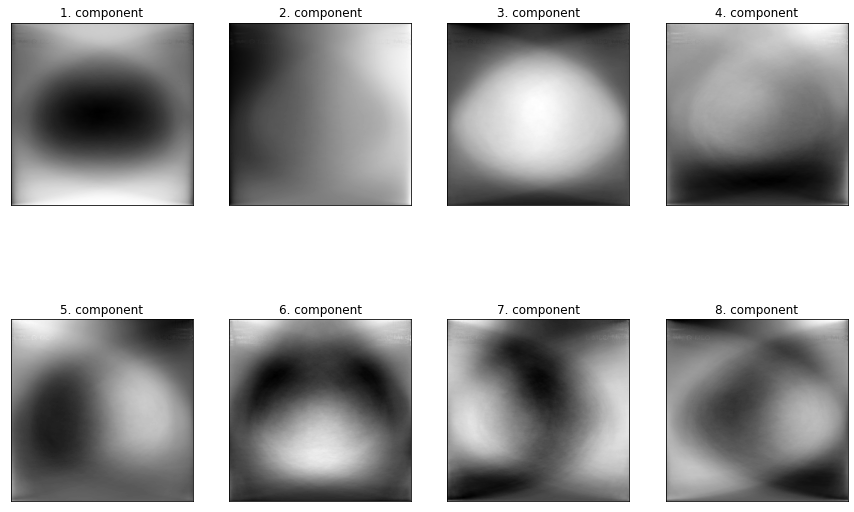

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_256_norm.components_[:8], axes.ravel())):
    ax.imshow(component.reshape(256, 256), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

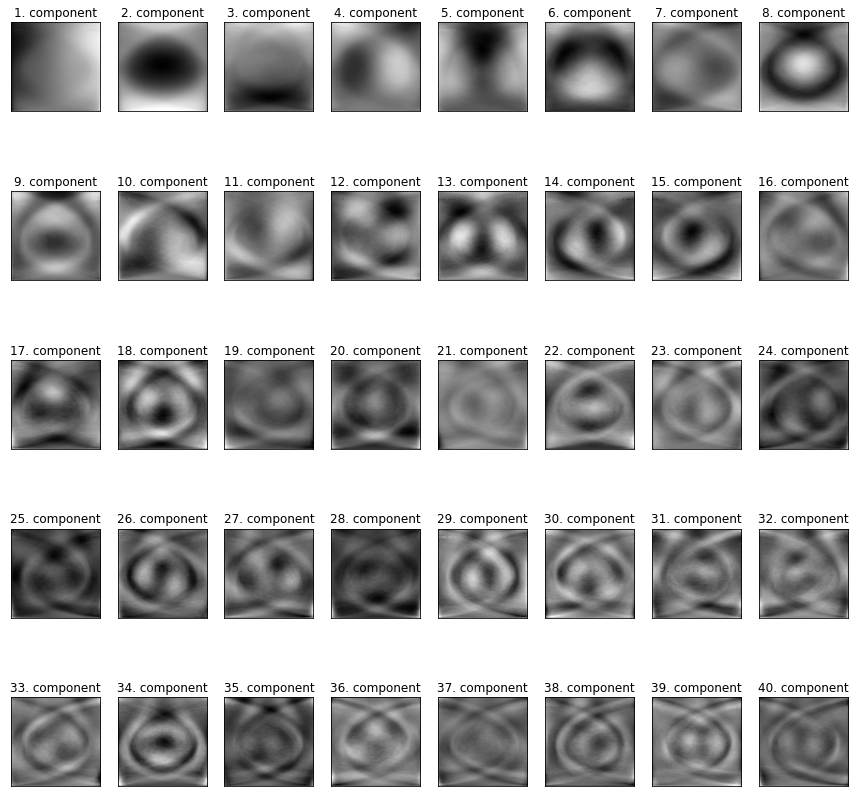

In [11]:
fig, axes = plt.subplots(5, 8, figsize=(15, 15), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_512.components_[:40], axes.ravel())):
    ax.imshow(component.reshape(512, 512), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

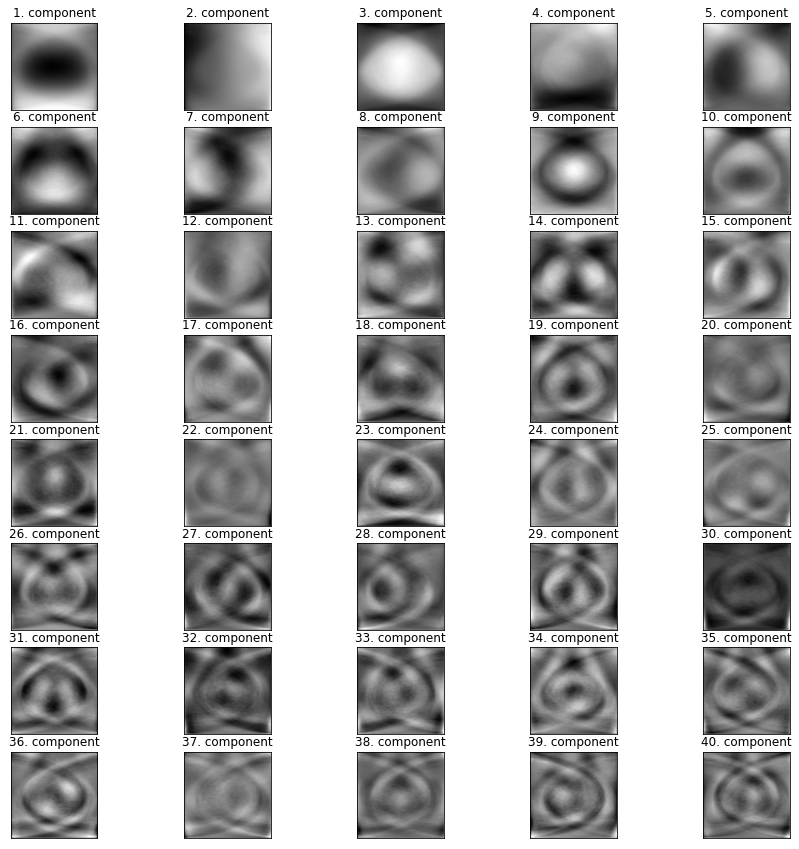

In [12]:
fig, axes = plt.subplots(8, 5, figsize=(15, 15), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(ipca_512_norm.components_[:40], axes.ravel())):
    ax.imshow(component.reshape(512, 512), cmap='gray')
    ax.set_title("{}. component".format((i + 1)))

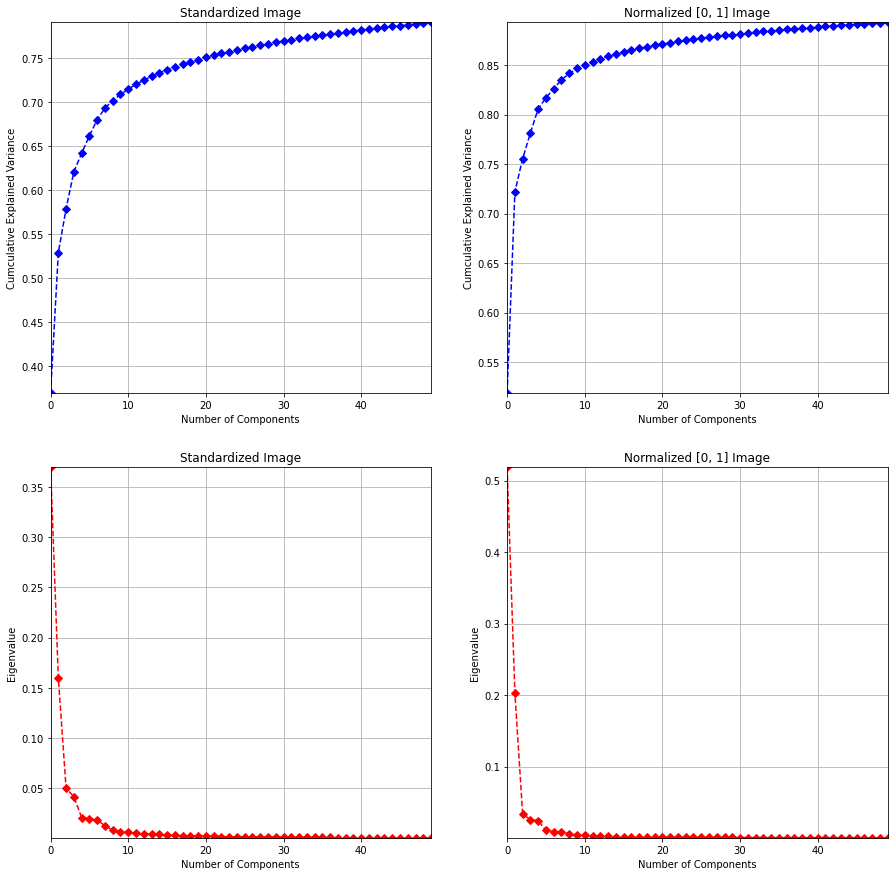

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

method = ['Standardized', 'Normalized [0, 1]']
for i, model in enumerate([ipca_256, ipca_256_norm]):
    
    axs[0, i].plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
    axs[0, i].set_title('{} Image'.format(method[i]))
    axs[0, i].set_xlabel('Number of Components')
    axs[0, i].set_xlabel('Number of Components')
    axs[0, i].set_ylabel('Cumculative Explained Variance')
    #axs[i, 0].set_ylim(0, 1)
    axs[0, i].margins(x=0,y=0)
    axs[0, i].grid(axis='both')
    
    axs[1, i].plot(model.explained_variance_ratio_[:50], marker='D', linestyle="--", color='red')
    axs[1, i].set_title('{} Image'.format(method[i]))
    axs[1, i].set_xlabel('Number of Components')
    axs[1, i].set_ylabel('Eigenvalue')
    #axs[i, 1].set_ylim(0, 1)
    axs[1, i].margins(x=0,y=0)
    axs[1, i].grid(axis='both')

## Reconstruction quality

In [19]:
train_meta = metadata[metadata.patient_id.isin(splitter.trainset.keys())]
cancer_sample = train_meta[train_meta.cancer==1].sample(3)
cancer_sample

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
20509,1,31745,1453551983,L,MLO,83.0,1,1,1,0.0,0,B,49,False
32768,1,45137,903730178,L,CC,68.0,1,1,1,0.0,0,C,216,False
2114,1,12258,1429876928,R,MLO,80.0,1,1,1,0.0,0,B,49,False


In [20]:
no_cancer_sample = train_meta[train_meta.cancer==0].sample(3)
no_cancer_sample

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
21948,1,33306,1032522892,L,CC,54.0,0,0,0,1.0,0,B,93,False
20869,1,32146,1428360162,L,MLO,70.0,0,0,0,1.0,0,B,49,False
23600,2,35152,2126513610,R,MLO,68.0,0,0,0,NaN,0,NaN,21,False


In [38]:
BASEPATH = '' # directory of training images 

original = {}

for img_id in cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(cancer_sample[cancer_sample.image_id==img_id].patient_id.unique()[0]) + '/' + str(img_id) +'.dcm'
    dcm = pydicom.dcmread(filepath)
    original[img_id] = dcm.pixel_array


for img_id in no_cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(no_cancer_sample[no_cancer_sample.image_id==img_id].patient_id.unique()[0]) + '/' + str(img_id) + '.dcm'
    dcm = pydicom.dcmread(filepath)
    original[img_id] = dcm.pixel_array

In [39]:
IMG_SIZE = (256, 256, 1)

preprocess_std = {}

for img_id in cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(cancer_sample[cancer_sample.image_id==img_id].patient_id.unique()[0]) 
    preprocess_std[img_id] = dl.read_and_preprocess(filepath, img_id, img_size=IMG_SIZE, normalize=(-1, 1))


for img_id in no_cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(no_cancer_sample[no_cancer_sample.image_id==img_id].patient_id.unique()[0]) 
    preprocess_std[img_id] = dl.read_and_preprocess(filepath, img_id, img_size=IMG_SIZE, normalize=(-1, 1))

In [65]:
preprocess_norm = {}

for img_id in cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(cancer_sample[cancer_sample.image_id==img_id].patient_id.unique()[0]) 
    preprocess_norm[img_id] = dl.read_and_preprocess(filepath, img_id, img_size=IMG_SIZE, normalize=(0, 1))


for img_id in no_cancer_sample.image_id:
    filepath = BASEPATH + '/' + str(no_cancer_sample[no_cancer_sample.image_id==img_id].patient_id.unique()[0]) 
    preprocess_norm[img_id] = dl.read_and_preprocess(filepath, img_id, img_size=IMG_SIZE, normalize=(0, 1))

In [41]:
def reconstruct_image(n_components, image):
    pca = PCA(n_components=n_components)
    image_compressed = pca.fit_transform(image)
    return pca.inverse_transform(image_compressed)

reconstruct_std = {}

for img_id in cancer_sample.image_id:
    img_arr = np.squeeze(preprocess_std[img_id])
    reconstruct_std[img_id] = {}
    
    for n in [8, 15, 30, 50, 100, 200]:
        reconstruct_std[img_id][n] = reconstruct_image(n, img_arr)


for img_id in no_cancer_sample.image_id:
    img_arr = np.squeeze(preprocess_std[img_id])
    
    reconstruct_std[img_id] = {}
    for n in [8, 15, 30, 50, 100, 200]:
        reconstruct_std[img_id][n] = reconstruct_image(n, img_arr)

In [42]:
reconstruct_norm = {}

for img_id in cancer_sample.image_id:
    img_arr = np.squeeze(preprocess_norm[img_id])
    reconstruct_norm[img_id] = {}
    
    for n in [8, 15, 30, 50, 100, 200]:
        reconstruct_norm[img_id][n] = reconstruct_image(n, img_arr)


for img_id in no_cancer_sample.image_id:
    img_arr = np.squeeze(preprocess_norm[img_id])
    
    reconstruct_norm[img_id] = {}
    for n in [8, 15, 30, 50, 100, 200]:
        reconstruct_norm[img_id][n] = reconstruct_image(n, img_arr)

In [79]:
def compare_img(img_id):
    
    n_components = [8, 15, 30, 50, 100, 200]
    
    std = []
    std.append(original[img_id])
    std.append(preprocess_std[img_id])
    for n in n_components:
        std.append(reconstruct_std[img_id][n])

    norm = []
    norm.append(original[img_id])
    norm.append(preprocess_norm[img_id])
    for n in n_components:
        norm.append(reconstruct_norm[img_id][n])

    title = ['original', 'preprocessed', 'n_comps=8', 'n_comps=15', 'n_comps=30', 'n_comps=50', 'n_comps=100', 'n_comps=200']
    fig, axes = plt.subplots(2, 8, figsize=(20, 8))

    for i, array in enumerate(std):
        
        if title[i] in ['original', 'preprocessed']:
            axes[0, i].imshow(array, cmap='gray')
            axes[0, i].set_title('Std-' + title[i])
                         
        else:
            axes[0, i].imshow(array.reshape(256, 256), cmap='gray')
            axes[0, i].set_title('Std-' + title[i])
        
    for i, array in enumerate(norm):

        if title[i] in ['original', 'preprocessed']:
            axes[1, i].imshow(array, cmap='gray')
            axes[1, i].set_title('Std-' + title[i])
        else:
            axes[1, i].imshow(array.reshape(256, 256), cmap='gray')
            axes[1, i].set_title('Norm-' + title[i])
   
    #return fig

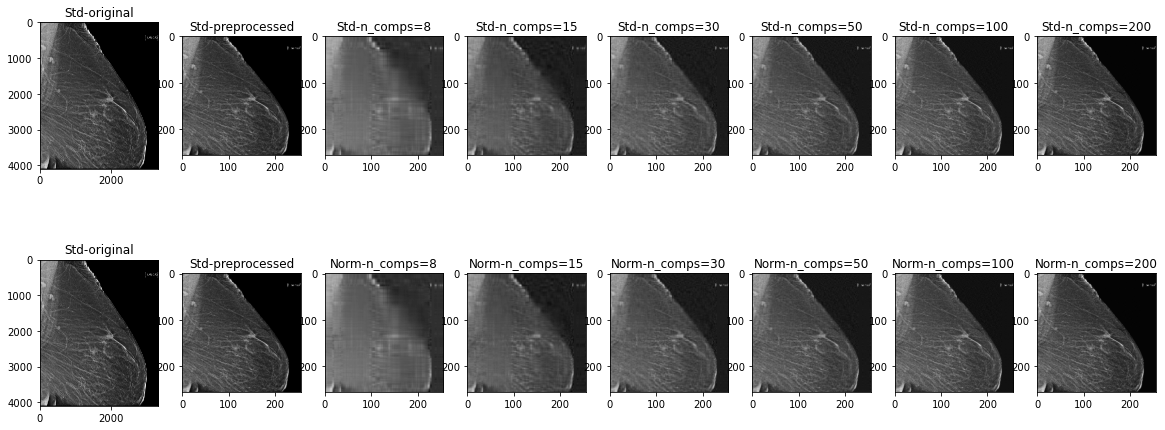

In [80]:
compare_img(cancer_sample.image_id.unique()[0])

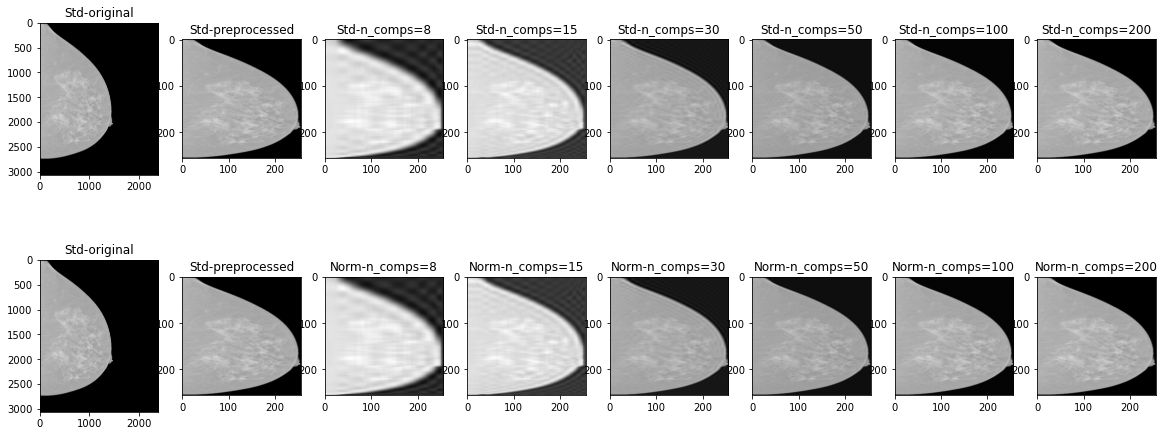

In [81]:
compare_img(no_cancer_sample.image_id.unique()[0])

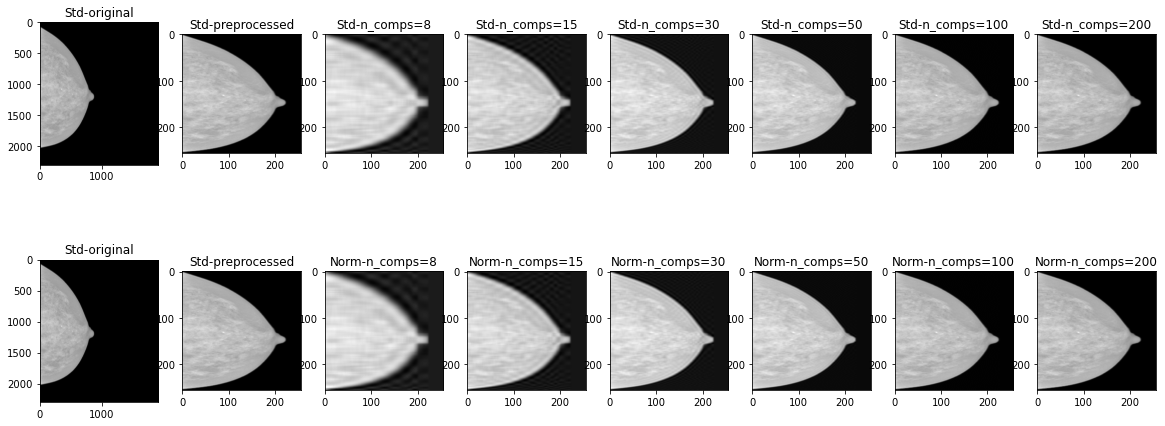

In [82]:
compare_img(cancer_sample.image_id.unique()[1])

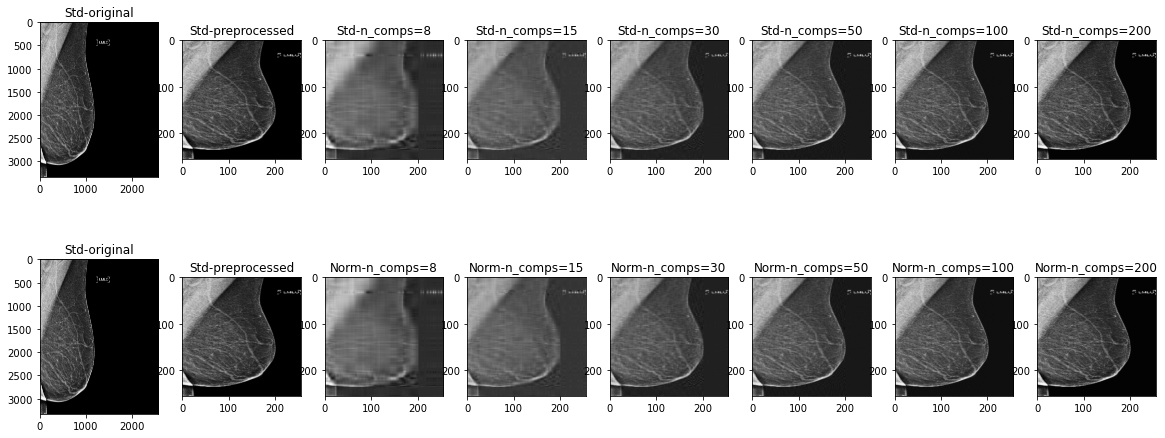

In [83]:
compare_img(no_cancer_sample.image_id.unique()[1])

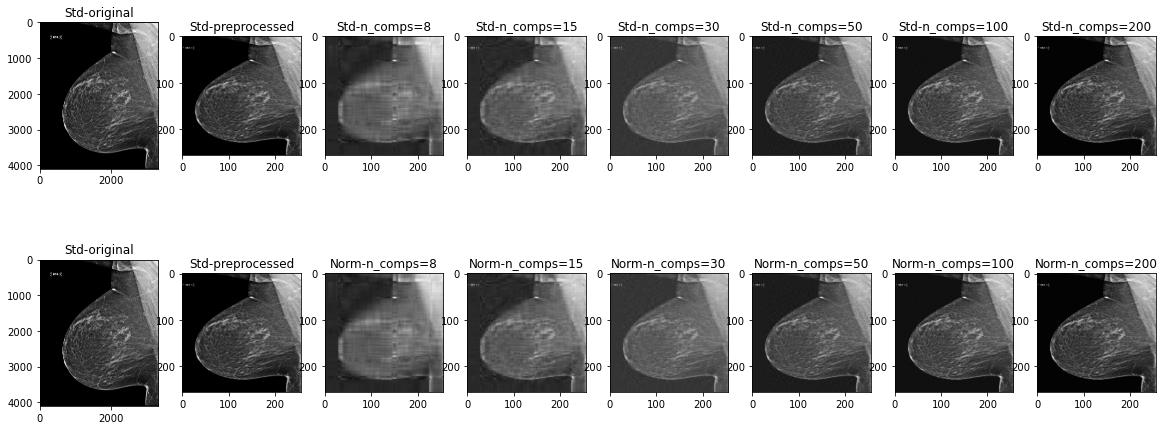

In [84]:
compare_img(cancer_sample.image_id.unique()[2])

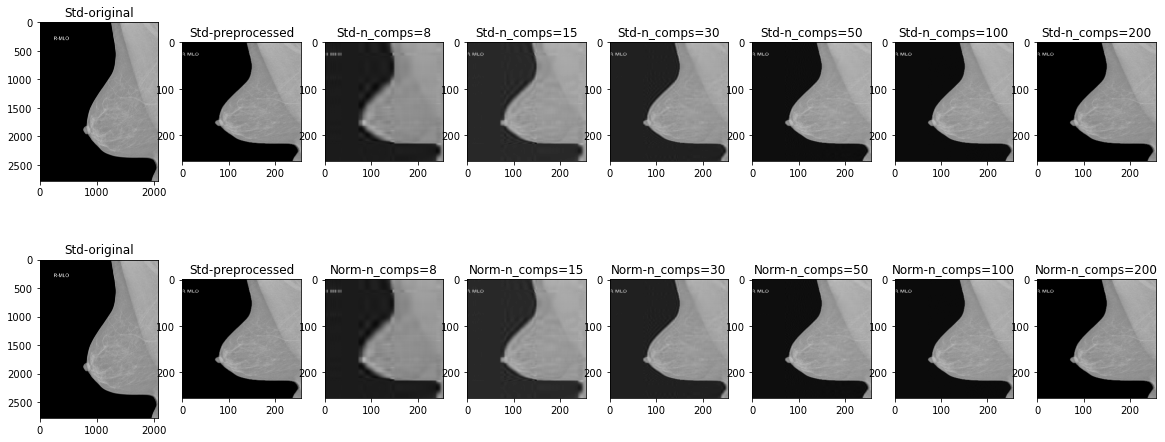

In [85]:
compare_img(no_cancer_sample.image_id.unique()[2])

# Pre-train PCA on each fold's training split
The images reconstructed from **50 components** seem to preserve enough details and contrast of the original image. Components from normalized images have higher explained variance ratio at 50 components compared to standardized images.

In [4]:
# splitter.trainset is the training set in format of {patient_id: [image_id, ...]}
train_ids = splitter.trainset.keys()
label_by_img = splitter.labels

# getting cross-validation folds from training set
RANDOM_STATE = 42
cv_patient, cv_img = splitter.get_cv(n_splits=5, random_state=RANDOM_STATE)

Splitting training set into 5 stratified k-folds...
--Fold:  0
----Total patient_id in training set:  6099
----Total image_id in training set:  28031
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6972
--Fold:  1
----Total patient_id in training set:  6099
----Total image_id in training set:  28016
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6987
--Fold:  2
----Total patient_id in training set:  6099
----Total image_id in training set:  27937
----Total patient_id in validation set:  1525
----Total image_id in validation set:  7066
--Fold:  3
----Total patient_id in training set:  6099
----Total image_id in training set:  28025
----Total patient_id in validation set:  1525
----Total image_id in validation set:  6978
--Fold:  4
----Total patient_id in training set:  6100
----Total image_id in training set:  28003
----Total patient_id in validation set:  1524
----Total image_id in validation set:  7000


In [5]:
for i in range(5):
    print(len(cv_img[i]['train']))

28031
28016
27937
28025
28003


In [8]:
N_COMPONENTS = 50

BATCH_SIZE = 488 # losing as less samples as possible
IMG_SIZE = (1024, 1024, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42

train_time_1024 = fex.cv_train_feature_extractor(
    cv_img = cv_img,
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (0, 1),
    
    from_numpy = True,
    random_state = RANDOM_STATE,
    
    model_name = 'PCA',
    n_components = N_COMPONENTS, 
    extractor_path = EXTRACTOR_PATH,
    verbose = True,
    evaluate = False,
    return_none = True   
)

Fold:  0
PCA model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_42_1024_0.pkl
-->> Training time:  0
Fold:  1
PCA model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_42_1024_1.pkl
-->> Training time:  0
Fold:  2
PCA model trained on this cross-validation fold already exist
--> /home/irinb/models/PCA_50_42_1024_2.pkl
-->> Training time:  0
Fold:  3
Initialized PCA with n_components = 50
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
-

In [6]:
N_COMPONENTS = 50

BATCH_SIZE = 488 # losing as less samples as possible
IMG_SIZE = (1024, 1024, 1)

BASEPATH = '' # directory of images preprocessed as numpy arrays
EXTRACTOR_PATH = '../feature_extractors' # directory to save trained models

RANDOM_STATE = 42

train_time_1024 = fex.cv_train_feature_extractor(
    cv_img = cv_img,
    patient_img_dict = splitter.trainset,
    batch_size = BATCH_SIZE,
    basepath = BASEPATH,
    img_size = IMG_SIZE,
    normalize = (0, 1),
    
    from_numpy = True,
    random_state = RANDOM_STATE,
    
    model_name = 'PCA',
    n_components = N_COMPONENTS, 
    extractor_path = EXTRACTOR_PATH,
    verbose = True,
    evaluate = False,
    return_none = True   
)

Fold:  0
Initialized PCA with n_components = 50
--Training batch  1
--Training batch  2
--Training batch  3
--Training batch  4
--Training batch  5
--Training batch  6
--Training batch  7
--Training batch  8
--Training batch  9
--Training batch  10
--Training batch  11
--Training batch  12
--Training batch  13
--Training batch  14
--Training batch  15
--Training batch  16
--Training batch  17
--Training batch  18
--Training batch  19
--Training batch  20
--Training batch  21
--Training batch  22
--Training batch  23
--Training batch  24
--Training batch  25
--Training batch  26
--Training batch  27
--Training batch  28
--Training batch  29
--Training batch  30
--Training batch  31
--Training batch  32
--Training batch  33
--Training batch  34
--Training batch  35
--Training batch  36
--Training batch  37
--Training batch  38
--Training batch  39
--Training batch  40
--Training batch  41
--Training batch  42
--Training batch  43
--Training batch  44
--Training batch  45
--Training batch

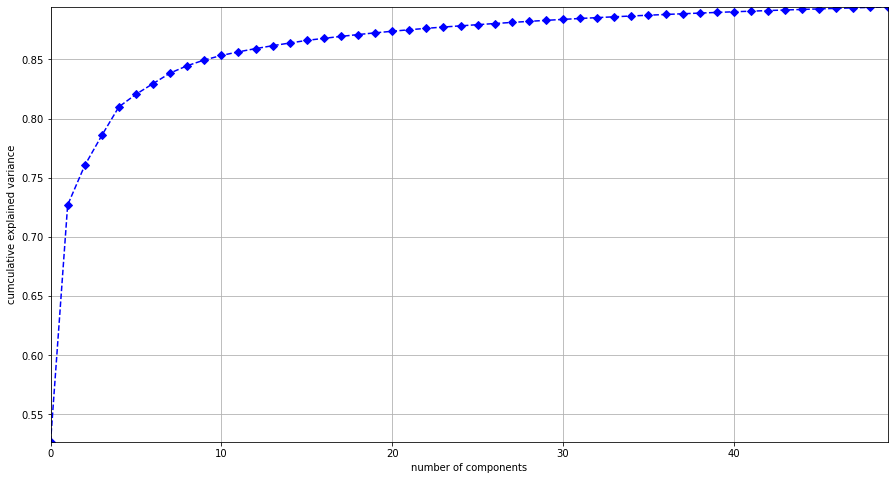

In [9]:
model = pickle.load(open('../feature_extractors/PCA_50_42_1024_0.pkl', 'rb'))

fig, axs = plt.subplots(figsize=(15, 8))

axs.plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

del model

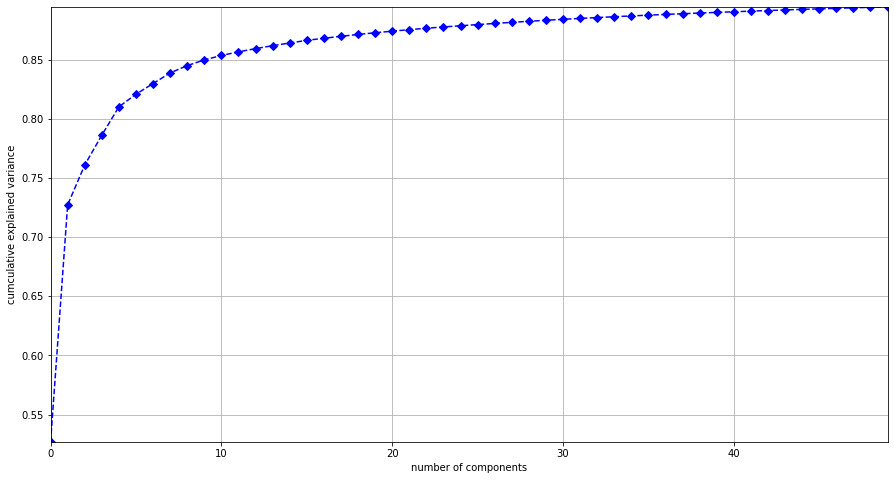

In [10]:
model = pickle.load(open('../feature_extractors/PCA_50_42_1024_1.pkl', 'rb'))

fig, axs = plt.subplots(figsize=(15, 8))

axs.plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

del model

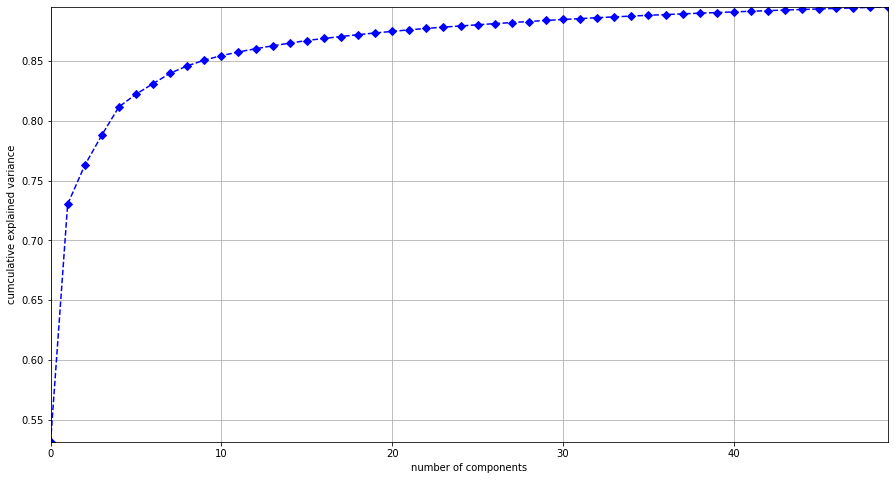

In [11]:
model = pickle.load(open('../feature_extractors/PCA_50_42_1024_2.pkl', 'rb'))

fig, axs = plt.subplots(figsize=(15, 8))

axs.plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

del model

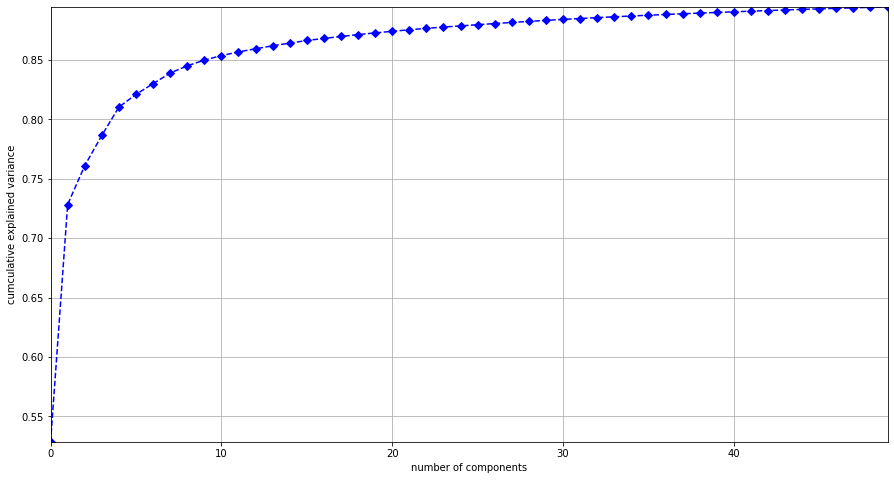

In [12]:
model = pickle.load(open('../feature_extractors/PCA_50_42_1024_3.pkl', 'rb'))

fig, axs = plt.subplots(figsize=(15, 8))

axs.plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

del model

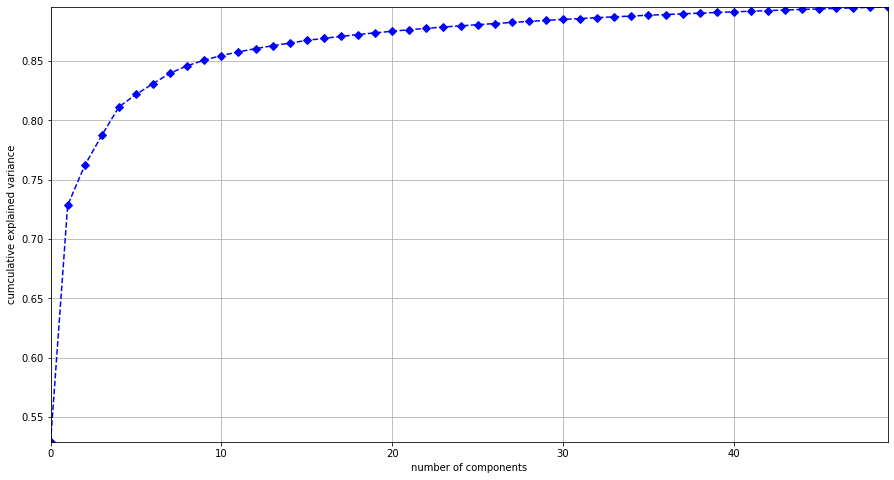

In [13]:
model = pickle.load(open('../feature_extractors/PCA_50_42_1024_4.pkl', 'rb'))

fig, axs = plt.subplots(figsize=(15, 8))

axs.plot(model.explained_variance_ratio_.cumsum()[:50], marker='D', linestyle="--", color='blue')
axs.set_xlabel('number of components')
axs.set_ylabel('cumculative explained variance')
axs.margins(x=0,y=0)
plt.grid(axis='both')
plt.show()

del model